# Simple Usage

## 1. Voigt profile

In [1]:
import numpy
import matplotlib.pyplot as plt
from exojax.spec import voigt

In [2]:
x=numpy.linspace(-10,10,100) 
y=voigt(x,1.0,2.0) #sigma_D=1.0, gamma_L=2.0

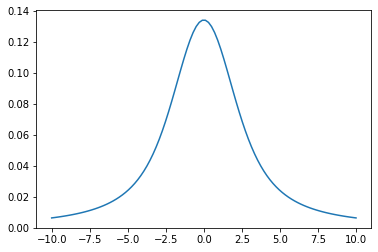

In [3]:
plt.plot(x,y)

## 2. Cross section

In [4]:
 from exojax.spec import AutoXS

exojax automatically downloads a molecular database, convert it to the feather format and save it in .database directory.

In [5]:
nus=numpy.linspace(1900.0,2300.0,40000,dtype=numpy.float64) #wavenumber (cm-1)
autoxs=AutoXS(nus,"ExoMol","CO") #using ExoMol CO (12C-16O). HITRAN and HITEMP are also supported.  
xsv=autoxs.xsection(1000.0,1.0) #cross section for 1000K, 1bar (cm2)

CO/12C-16O/Li2015
Background atmosphere:  H2
Reading transition file
default broadening parameters are used for  71  J lower states in  152  states


100%|██████████| 19/19 [00:00<00:00,  4.57it/s]


Text(0, 0.5, 'cross section (cm2)')

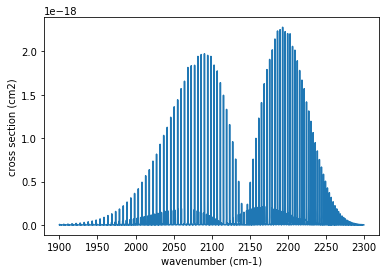

In [6]:
plt.plot(nus,xsv) #cm2
plt.xlabel("wavenumber (cm-1)")
plt.ylabel("cross section (cm2)")

You can plot the line strengths. 

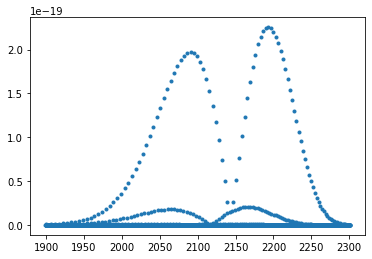

In [7]:
ls=autoxs.linest(1000.0,1.0) #line strength for 1000K, 1bar (cm)
plt.plot(autoxs.mdb.nu_lines,ls,".")

In [8]:
from exojax.spec.rtransfer import nugrid
from exojax.spec import AutoRT

In [9]:
nus,wav,res=nugrid(1900.0,2300.0,40000,"cm-1")
Parr=numpy.logspace(-8,2,100)
Tarr = 500.*(Parr/Parr[-1])**0.02    
autort=AutoRT(nus,1.e5,2.33,Tarr,Parr) #g=1.e5 cm/s2, mmw=2.33
autort.addcia("H2-H2",0.74,0.74)       #CIA, mmr(H)=0.74
autort.addcia("H2-He",0.74,0.25)       #CIA, mmr(He)=0.25
autort.addmol("ExoMol","CO",0.01)      #CO line, mmr(CO)=0.01

nu grid is evenly spaced in log space (ESLOG).
H2-H2
H2-He
CO/12C-16O/Li2015
Background atmosphere:  H2
Reading transition file
default broadening parameters are used for  71  J lower states in  152  states


100%|██████████| 38/38 [00:15<00:00,  1.66it/s]


In [10]:
F=autort.rtrun()

Text(0, 0.5, 'flux (erg/s/cm2/cm-1)')

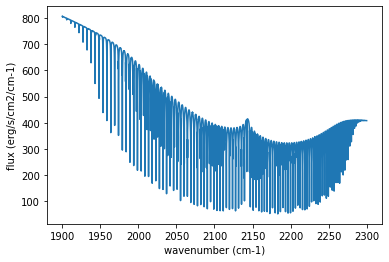

In [11]:
plt.plot(nus,F)
plt.xlabel("wavenumber (cm-1)")
plt.ylabel("flux (erg/s/cm2/cm-1)")

Text(0, 0.5, 'flux (erg/s/cm2/cm-1)')

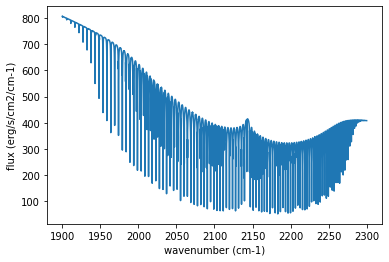

In [12]:
plt.plot(nus,F)
plt.xlabel("wavenumber (cm-1)")
plt.ylabel("flux (erg/s/cm2/cm-1)")

In [14]:
nusobs=numpy.linspace(1900.0,2300.0,1000,dtype=numpy.float64) #observation wavenumber bin (cm-1)
Fobs=autort.spectrum(nusobs,100000.0,20.0,0.0) #R=100000, vsini=10km/s, RV=0km/s

radiative transfer 0.011783361434936523 s


RuntimeError: Resource exhausted: Out of memory while trying to allocate 6400160016 bytes.: while running replica 0 and partition 0 of a replicated computation (other replicas may have failed as well).

In [ ]:
plt.plot(nus,F)
plt.plot(nusobs,Fobs)
plt.xlabel("wavenumber (cm-1)")
plt.ylabel("flux (erg/s/cm2/cm-1)")

In [ ]:
plt.plot(nus,F)
plt.plot(nusobs,Fobs)
plt.xlim(2100,2110)
plt.ylim(0,450)
plt.xlabel("wavenumber (cm-1)")
plt.ylabel("flux (erg/s/cm2/cm-1)")

The contribution function

In [48]:
from exojax.plot.atmplot import plotcf

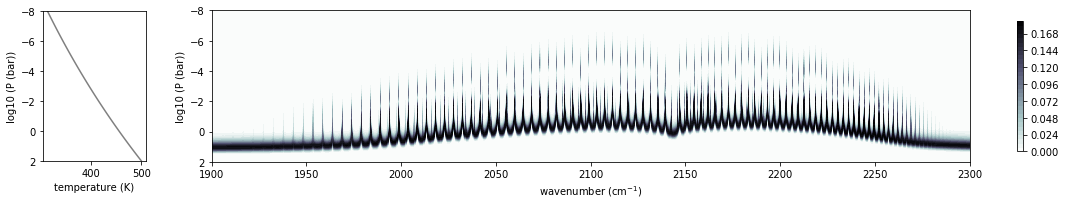

In [51]:
cf=plotcf(nus,autort.dtau,Tarr,Parr,autort.dParr)